## Bot-IoT Dataset Graph Representation using NetworkX
### Introduction
This project aims to analyze the Bot-IoT dataset by representing its components and interactions as a graph using NetworkX in Python. The dataset comprises network platforms, simulated IoT services, and features extracted for forensics analytics. By employing NetworkX, this study seeks to elucidate the structural properties, connectivity patterns, and centrality measures within the Bot-IoT network, offering insights into its dynamics and vulnerabilities.

### Importing modules

In [128]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Dataset Description
The Bot-IoT Dataset offers a comprehensive view of network interactions within a simulated environment. This dataset is invaluable for understanding and mitigating cybersecurity threats, particularly those targeting Internet of Things (IoT) devices. In this project, we aim to represent this dataset as a graph using Python's NetworkX library, facilitating visual analysis and insights into the network's structure and behavior.

### Network Platforms
The dataset includes normal and attacking VMs, alongside network devices like firewalls and taps.

### Simulated IoT Services
IoT devices are simulated, which periodically submit the messages to local and cloud-based brokers. Notable IoT scenarios include weather stations, smart fridges, motion-activated lights, garage doors, and smart thermostats.

In [163]:
# low_memory used to load the entire file into memory and deal with the mixed data types
df = pd.read_csv('final.csv', low_memory=False)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148521 entries, 0 to 148520
Data columns (total 35 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   pkSeqID       148521 non-null  int64  
 1   stime         148521 non-null  float64
 2   flgs          148521 non-null  object 
 3   proto         148521 non-null  object 
 4   saddr         148521 non-null  object 
 5   sport         148079 non-null  object 
 6   daddr         148521 non-null  object 
 7   dport         148079 non-null  object 
 8   pkts          148521 non-null  int64  
 9   bytes         148521 non-null  int64  
 10  state         148521 non-null  object 
 11  ltime         148521 non-null  float64
 12  seq           148521 non-null  int64  
 13  dur           148521 non-null  float64
 14  mean          148521 non-null  float64
 15  stddev        148521 non-null  float64
 16  smac          0 non-null       float64
 17  dmac          0 non-null       float64
 18  sum 

In [165]:
# Removing NaN values
df.dropna(inplace=True, how='all', axis=1)
df.dropna(inplace=True, how='any', axis=0)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148079 entries, 0 to 148520
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   pkSeqID       148079 non-null  int64  
 1   stime         148079 non-null  float64
 2   flgs          148079 non-null  object 
 3   proto         148079 non-null  object 
 4   saddr         148079 non-null  object 
 5   sport         148079 non-null  object 
 6   daddr         148079 non-null  object 
 7   dport         148079 non-null  object 
 8   pkts          148079 non-null  int64  
 9   bytes         148079 non-null  int64  
 10  state         148079 non-null  object 
 11  ltime         148079 non-null  float64
 12  seq           148079 non-null  int64  
 13  dur           148079 non-null  float64
 14  mean          148079 non-null  float64
 15  stddev        148079 non-null  float64
 16  sum           148079 non-null  float64
 17  min           148079 non-null  float64
 18  max 

The dataset includes features extracted from network traffic, such as packet sizes, timestamps, and protocol types.

In [135]:
df.rename(columns={
    "pkSeqID": "ID",  # The identifier of the row
    "stime": "StartTime",  # Record start time
    "ltime": "LastTime",  # Record last time
    "flgs": "Flags", # Flow state flags seen in transactions
    "seq": "ArgusSequenceNumber",  # Argus sequence number
    "dur": "TotalDuration",  # Record total duration
    "mean": "AverageDuration",  # Average duration of aggregated records
    "stddev": "StandardDeviation",  # Standard deviation of aggregated records
    "sum": "TotalDurationAggregated",  # Total duration of aggregated records
    "Stime": "StartTime",  # Record start time
    "proto": "Protocol",  # Textual representation of transaction protocols present in network flow
    "saddr": "SourceIPAddress",  # Source IP address
    "sport": "SourcePort",  # Source port number
    "daddr": "DestinationIPAddress",  # Destination IP address
    "dport": "DestinationPort",  # Destination port number
    "pkts": "PacketCount",  # Total count of packets in transaction
    "bytes": "TotalBytes",  # Total number of bytes in transaction records
    "state": "TransactionState",  # Transaction state
    "min": "MinimumDuration",  # Minimum duration of aggregated records
    "max": "MaximumDuration",  # Maximum duration of aggregated records
    "spkts": "SourceToDestinationPacketCount",  # Source-to-destination packet count
    "dpkts": "DestinationToSourcePacketCount",  # Destination-to-source packet count
    "sbytes": "SourceToDestinationByteCount",  # Source-to-destination byte count
    "dbytes": "DestinationToSourceByteCount",  # Destination-to-source byte count
    "rate": "TotalPacketsPerSecond",  # Total packets per second in transaction
    "srate": "SourceToDestinationPacketsPerSecond",  # Source-to-destination packets per second
    "drate": "DestinationToSourcePacketsPerSecond",  # Destination-to-source packets per second
    "attack": "Attack",  # Class label: 0 for Normal traffic, 1 for Attack Traffic
    "category": "TrafficCategory",  # Traffic category
    "subcategory ": "TrafficSubcategory"  # Traffic subcategory
}, inplace=True)

In [136]:
object_columns = df.select_dtypes(include='object').columns.tolist()
print(object_columns)


['Flags', 'Protocol', 'SourceIPAddress', 'SourcePort', 'DestinationIPAddress', 'DestinationPort', 'TransactionState', 'TrafficCategory', 'TrafficSubcategory']


In [137]:
encoder = LabelEncoder()

encoded_df = df.copy()

for col in object_columns:
    encoded_df[col] = encoder.fit_transform(encoded_df[col])

encoded_df.drop(object_columns, axis=1, inplace=True)

In [138]:
encoded_df.corr()

,ID,StartTime,PacketCount,TotalBytes,LastTime,ArgusSequenceNumber,TotalDuration,AverageDuration,StandardDeviation,TotalDurationAggregated,MinimumDuration,MaximumDuration,SourceToDestinationPacketCount,DestinationToSourcePacketCount,SourceToDestinationByteCount,DestinationToSourceByteCount,TotalPacketsPerSecond,SourceToDestinationPacketsPerSecond,DestinationToSourcePacketsPerSecond,Attack
ID,1.000000,0.509902,-0.046959,-0.047233,0.509895,0.427882,-0.013531,0.637865,0.640430,0.006879,0.287249,0.755744,-0.046155,-0.047763,-0.047164,-0.047301,-0.259212,-0.136961,-0.132713,0.173071
StartTime,0.509902,1.000000,-0.084719,-0.085251,1.000000,0.120838,0.089967,0.446523,0.420953,-0.049186,0.218349,0.508884,-0.083994,-0.085444,-0.085189,-0.085312,-0.328371,-0.082716,-0.093498,0.262835
PacketCount,-0.046959,-0.084719,1.000000,0.999999,-0.084599,-0.053574,0.934819,0.150401,-0.036619,0.996624,0.201947,0.093483,0.999999,0.999999,0.999999,0.999999,-0.019336,-0.009730,-0.009070,-0.261178
TotalBytes,-0.047233,-0.085251,0.999999,1.000000,-0.085130,-0.053542,0.934618,0.150016,-0.037135,0.996563,0.201982,0.092997,0.999997,1.000000,1.000000,1.000000,-0.019121,-0.009780,-0.009134,-0.261363
LastTime,0.509895,1.000000,-0.084599,-0.085130,1.000000,0.120823,0.090094,0.446538,0.420952,-0.049066,0.218367,0.508895,-0.083874,-0.085324,-0.085068,-0.085192,-0.328382,-0.082722,-0.093504,0.262807
ArgusSequenceNumber,0.427882,0.120838,-0.053574,-0.053542,0.120823,1.000000,-0.105607,0.301593,0.241115,-0.035351,0.173964,0.317968,-0.053353,-0.053795,-0.053516,-0.053568,-0.128063,0.073678,0.111492,0.172953
TotalDuration,-0.013531,0.089967,0.934819,0.934618,0.090094,-0.105607,1.000000,0.156626,0.029835,0.936602,0.160797,0.129817,0.934966,0.934671,0.934619,0.934616,-0.109265,-0.057644,-0.055435,-0.194421
AverageDuration,0.637865,0.446523,0.150401,0.150016,0.446538,0.301593,0.156626,1.000000,0.486952,0.217579,0.739699,0.901951,0.151245,0.149557,0.150076,0.149957,-0.245847,-0.130277,-0.125974,0.101520
StandardDeviation,0.640430,0.420953,-0.036619,-0.037135,0.420952,0.241115,0.029835,0.486952,1.000000,0.019628,-0.157788,0.786133,-0.035684,-0.037553,-0.037060,-0.037209,-0.218746,-0.115988,-0.112210,0.139205
TotalDurationAggregated,0.006879,-0.049186,0.996624,0.996563,-0.049066,-0.035351,0.936602,0.217579,0.019628,1.000000,0.230628,0.163984,0.996721,0.996524,0.996570,0.996557,-0.037833,-0.019743,-0.018777,-0.249170


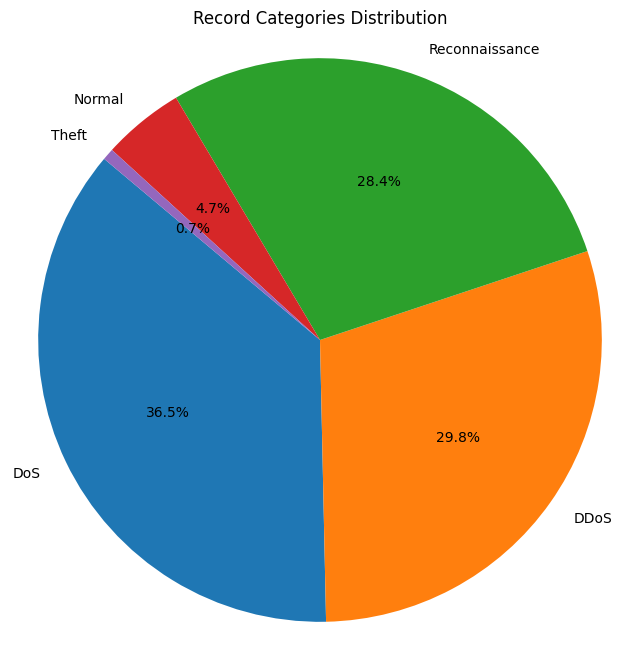

In [139]:
# get the counts of each category
value_counts = df['TrafficCategory'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)    
plt.title('Record Categories Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

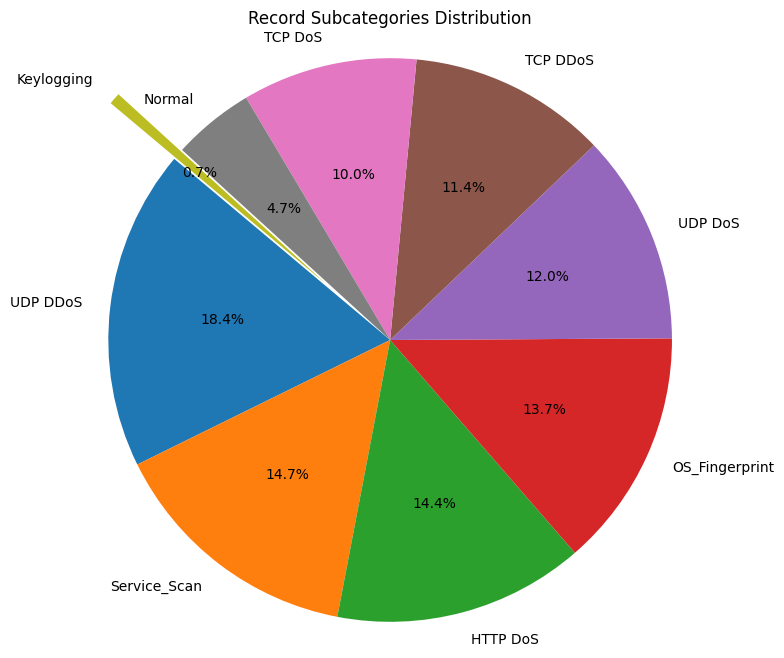

In [140]:
# get the counts of each category
value_counts = df['TrafficSubcategory'].value_counts()

# Define a function to calculate the offset of the slices which are too hard to see
def calculate_explode(values):
    explode_values = []
    total_values = values.sum()
    for value in values:
        if value / total_values < 0.009:
            explode_values.append(0.3)
        else:
            explode_values.append(0)
    return explode_values

# Calculate explode values
explode = calculate_explode(value_counts)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, explode=explode)    
plt.title('Record Subcategories Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

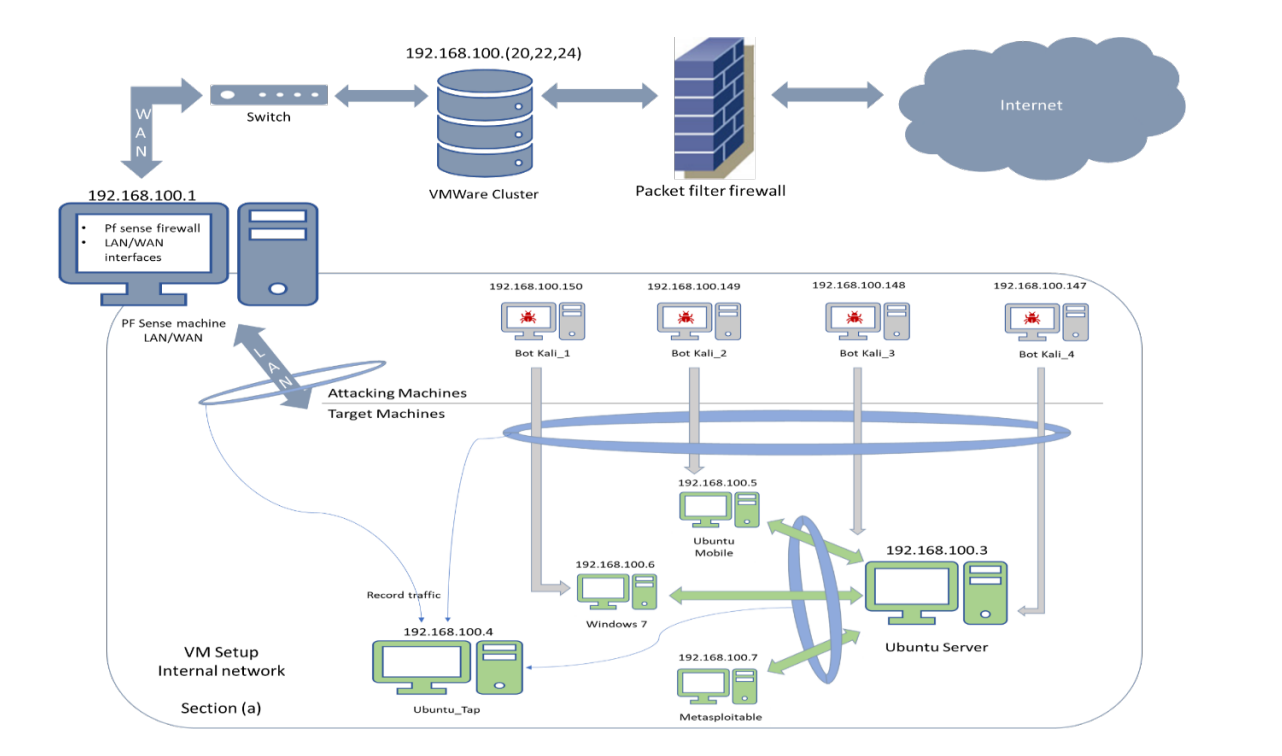

In [141]:
attackers = ['192.168.100.150', '192.168.100.149', '192.168.100.147', '192.168.100.148',]
ubuntu = ['192.168.100.7', '192.168.100.3', '192.168.100.6', '192.168.100.5']
others = df['SourceIPAddress'].value_counts().index.tolist() + df['DestinationIPAddress'].value_counts().index.tolist()
others = [x for x in others if x not in attackers and x not in ubuntu and x not in ["fe80::250:56ff:febe:c038"]]

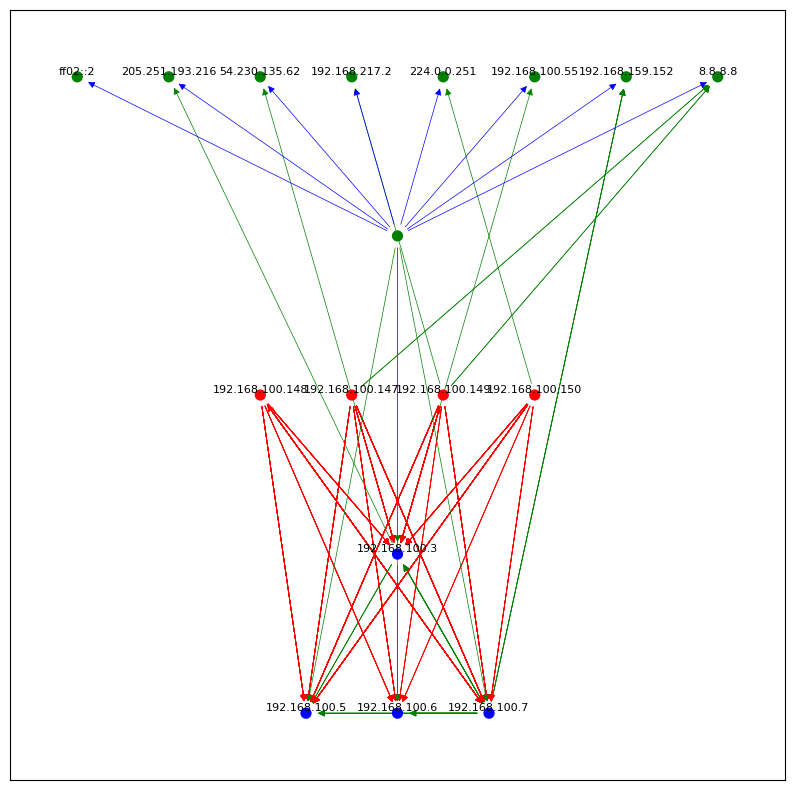

In [142]:
Graph = nx.MultiDiGraph()
Graph.add_nodes_from([x for x in ubuntu if x != '192.168.100.3'], part=0)
Graph.add_nodes_from(["192.168.100.3"], part=1)
Graph.add_nodes_from(attackers, part=2)
Graph.add_nodes_from(["fe80::250:56ff:febe:c038"], part=3)
Graph.add_nodes_from(others, part=4)

labels = {}  # Initialize labels dictionary

for attacker in attackers:
    labels[attacker] = attacker
    df_attacker = df[(df['SourceIPAddress'] == attacker) | (df['DestinationIPAddress'] == attacker)]
    for index, row in df_attacker.iterrows():
        edge_color = 'red' if row['Attack'] == 1 else 'green'  # Set edge color directly

        if row['SourceIPAddress'] == attacker:
            Graph.add_edge(attacker, row['DestinationIPAddress'], key=index, color=edge_color)  # Add 'color' attribute
            if row['DestinationIPAddress'] in others:
                labels[row['DestinationIPAddress']] = row['DestinationIPAddress']
        else:
            Graph.add_edge(row['SourceIPAddress'], attacker, key=index, color=edge_color)  # Add 'color' attribute
            if row['SourceIPAddress'] in others:
                labels[row['SourceIPAddress']] = row['SourceIPAddress']

for ubuntu_ip in ubuntu:
    labels[ubuntu_ip] = ubuntu_ip
    df_ubuntu = df[(~df['SourceIPAddress'].isin(attackers)) & (~df['DestinationIPAddress'].isin(attackers))]
    for index, row in df_ubuntu.iterrows():
        edge_color = "green"
        if row['SourceIPAddress'] == ubuntu_ip:
            Graph.add_edge(ubuntu_ip, row['DestinationIPAddress'], key=index, color=edge_color)  # Add 'color' attribute
            if row['DestinationIPAddress'] in others:
                labels[row['DestinationIPAddress']] = row['DestinationIPAddress']
        else:
            Graph.add_edge(row['SourceIPAddress'], ubuntu_ip, key=index, color=edge_color)  # Add 'color' attribute

for other_ip in others:
    labels[other_ip] = other_ip
    df_other = df[(~df['SourceIPAddress'].isin(attackers)) & (~df['DestinationIPAddress'].isin(attackers)) & (~df['SourceIPAddress'].isin(ubuntu)) & (~df['DestinationIPAddress'].isin(ubuntu))]
    for index, row in df_other.iterrows():
        edge_color = "blue"
        if row['SourceIPAddress'] == other_ip:
            Graph.add_edge(other_ip, row['DestinationIPAddress'], key=index, color=edge_color)  # Add 'color' attribute
            if row['DestinationIPAddress'] in others:
                labels[row['DestinationIPAddress']] = row['DestinationIPAddress']
        else:
            Graph.add_edge(row['SourceIPAddress'], other_ip, key=index, color=edge_color)  # Add 'color' attribute

pos = nx.multipartite_layout(Graph, subset_key="part", align='horizontal')

node_colors = ['blue' if node in ubuntu else 'red' if node in attackers else 'green' for node in Graph.nodes()]

plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(Graph, pos, node_color=node_colors, node_size=50)
edges = nx.draw_networkx_edges(Graph, pos, edge_color=[d['color'] for u, v, d in Graph.edges(data=True)], width=0.5)
nx.draw_networkx_labels(Graph, pos, labels=labels, font_size=8, verticalalignment='bottom') 
plt.show()

/tmp/ipykernel_15389/3310969340.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('Set1', len(unique_edge_values))


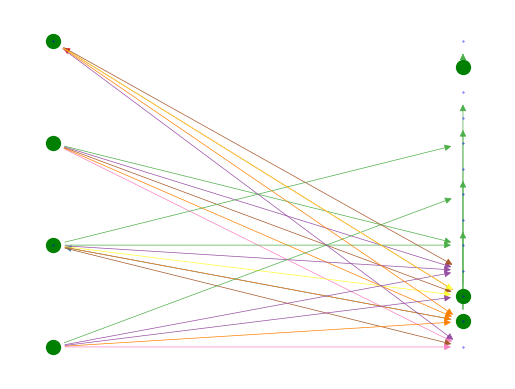

In [143]:
def representation(df, source, destination, edge):
  Graph = nx.DiGraph()

  # Add edges with attributes from DataFrame
  for _, row in df.iterrows():
      Graph.add_edge(row[source], row[destination], weight=row[edge])

  pos = nx.bipartite_layout(Graph, attackers)
  unique_edge_values = np.unique(df[edge])

  # Create a colormap with enough colors for all unique edge values
  colormap = plt.cm.get_cmap('Set1', len(unique_edge_values))

  # Create a dictionary to map unique edge values to colors
  edge_color_map = {value: colormap(i) for i, value in enumerate(unique_edge_values)}

  # Create a list to store edges and their colors
  edge_list = []

  for u, v, d in Graph.edges(data=True):
      edge_color = edge_color_map[d['weight']]
      edge_list.append((u, v, edge_color))

  # Draw the graph
  nx.draw_networkx_nodes(Graph, pos, nodelist=df[source].unique(), node_color='green', node_size=100)
  nx.draw_networkx_nodes(Graph, pos, nodelist=df[destination].unique(), node_color='blue', node_size=0.1)

  # Draw edges with colors based on the edge attribute value
  for u, v, color in edge_list: 
      nx.draw_networkx_edges(Graph, pos, edgelist=[(u, v)], edge_color=color, width=0.5)

  plt.axis('off')  # Turn off axis
  plt.show()


representation(df, "SourceIPAddress", "DestinationIPAddress", "TrafficSubcategory") # First representation

In [144]:
df["SourceIPAddress"].unique() # Unique values of SourceIPAddress

array(['192.168.100.147', '192.168.100.3', '192.168.100.150',
       '192.168.100.148', '192.168.100.149', '192.168.100.7',
       'fe80::250:56ff:febe:c038'], dtype=object)

In [145]:
df.loc[df['DestinationIPAddress'].isin(attackers), 'SourceIPAddress'].unique()

array(['192.168.100.3', '192.168.100.7'], dtype=object)

In [146]:
df.loc[df['SourceIPAddress'].isin(attackers), 'DestinationIPAddress'].unique()

array(['192.168.100.5', '192.168.100.3', '192.168.100.7', '192.168.100.6',
       '8.8.8.8', '224.0.0.251', '192.168.217.2'], dtype=object)

In [147]:
a = df.loc[df['DestinationIPAddress'].isin(attackers) & df["Attack"] == 1]

In [148]:
a["SourceIPAddress"].unique()

array(['192.168.100.3', '192.168.100.7'], dtype=object)

In [149]:
df.head()

,ID,StartTime,Flags,Protocol,SourceIPAddress,SourcePort,DestinationIPAddress,DestinationPort,PacketCount,TotalBytes,...,SourceToDestinationPacketCount,DestinationToSourcePacketCount,SourceToDestinationByteCount,DestinationToSourceByteCount,TotalPacketsPerSecond,SourceToDestinationPacketsPerSecond,DestinationToSourcePacketsPerSecond,Attack,TrafficCategory,TrafficSubcategory
141664,64649249,1.528100e+09,e,udp,192.168.100.147,39269,192.168.100.5,80,3,180,...,3,0,180,0,0.237446,0.237446,0.0,1,DDoS,UDP DDoS
85100,1828807,1.529381e+09,e,tcp,192.168.100.3,55055,192.168.100.149,4433,2,134,...,1,1,74,60,7142.856934,0.000000,0.0,1,Theft,Keylogging
39964,1151828,1.526967e+09,e,tcp,192.168.100.147,52071.0,192.168.100.3,35188.0,2,120,...,1,1,60,60,4444.444336,0.000000,0.0,1,Reconnaissance,Service_Scan
112973,52172466,1.528098e+09,e s,tcp,192.168.100.147,49617.0,192.168.100.7,80.0,5,770,...,5,0,770,0,0.178890,0.178890,0.0,1,DDoS,TCP DDoS
9940,1621204,1.526895e+09,e,tcp,192.168.100.147,42733,192.168.100.6,1060,2,120,...,1,1,60,60,16666.667969,0.000000,0.0,1,Reconnaissance,OS_Fingerprint


In [150]:
representation(df, "Attack", "SourceIPAddress") # Second representation

TypeError: representation() missing 1 required positional argument: 'edge'

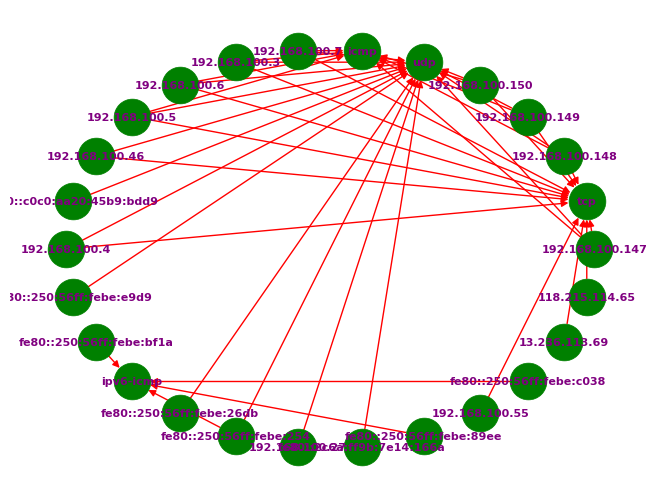

In [ ]:
representation(df, "SourceIPAddress", "Protocol") # Third representation

In [ ]:
# Fourth representation
# user_node = input("Enter the attribute that will be used as a node: ") # For example: SourceIP
# user_edge = input("Enter the attribute that will be used as an edge: ") # For example: State
# representation(df, user_node, user_edge)

In [151]:
import networkx as nx

def bfs(G: nx.DiGraph, start: str, end: str):
    # Check if the start and end nodes are in the graph
    if start not in G.nodes() or end not in G.nodes():
        return None

    # Initialize a queue to store nodes to be explored
    queue = [(start, [start])]

    # While there are nodes in the queue
    while queue:
        # Dequeue a node and its path
        node, path = queue.pop(0)

        # Check if the current node is the end node
        if node == end:
            return path

        # Explore neighbors of the current node
        for neighbor in G.neighbors(node):
            # Avoid revisiting nodes already in the path
            if neighbor not in path:
                # Enqueue neighbor node and its path
                queue.append((neighbor, path + [neighbor]))

    # If the end node is not reached, return None
    return None

In [152]:
def calculate_packets(Graph, path):
  packets = 0

  for i in range(len(path) - 1):
    origin = path[i]
    destination = path[i + 1]

    if Graph.has_edge(origin, destination):
      packets += Graph[origin][destination]["PacketCount"]
    else:
      print(f"Warning: No direct edge between {origin} and {destination}")

  return packets

In [153]:
Graph = nx.from_pandas_edgelist(df, "SourceIPAddress", "DestinationIPAddress", ["Attack", "PacketCount"], 
                                create_using = nx.DiGraph())
graph_dict = dict(Graph.adjacency())

origin = "192.168.100.150"
destination = "192.168.217.2"

path = bfs(Graph, origin, destination)

print("\n", end = "")
if path:
  print(f"Path from {origin} to {destination}: ", end = "")
  for ip in path:
    if ip != path[-1]:
      print(f"{ip} -> ", end = "")
    else:
      print(ip)
  
  packets = calculate_packets(Graph, path)
  print(f"Total number of sent packets: {packets}")
else:
  print(f"No path found from {origin} to {destination}")
print("\n", end = "")


Path from 192.168.100.150 to 192.168.217.2: 192.168.100.150 -> 192.168.100.3 -> 192.168.100.149 -> 192.168.217.2
Total number of sent packets: 14



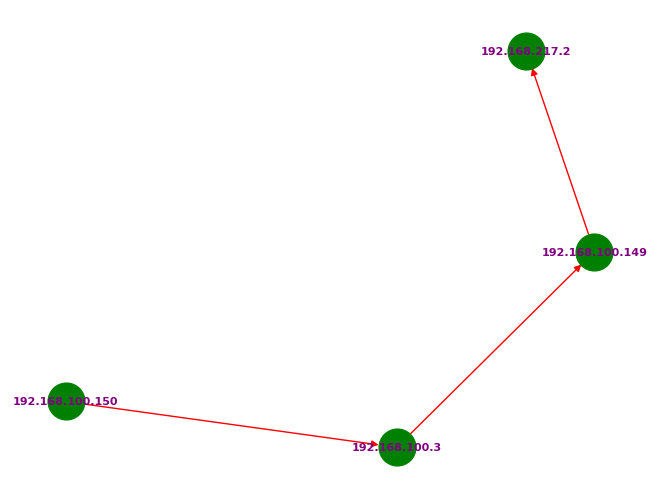

In [154]:
path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
path_graph = Graph.edge_subgraph(path_edges)
pos = nx.spring_layout(path_graph)
nx.draw(path_graph, pos, with_labels=True, font_weight="bold", font_size = 8, node_color="green", 
        node_size = 700, edge_color = "red", font_color = "purple")
plt.show()

In [155]:
def representation_with_colors(data, node, edge, colors):
  Graph = nx.from_pandas_edgelist(data, node, edge, create_using = nx.DiGraph())
  
  source_ip_colors = {ip: color for ip, color in zip(data["Protocol"].unique(), colors)}
  node_colors = [source_ip_colors.get(ip, "green") for ip in Graph.nodes()]

  pos = nx.circular_layout(Graph)
  nx.draw(Graph, pos, with_labels = True, font_weight = "bold", node_size = 700, node_color = node_colors,
      edge_color = "red", font_size = 8, linewidths = 0.5, font_color = "purple") 

  plt.show()

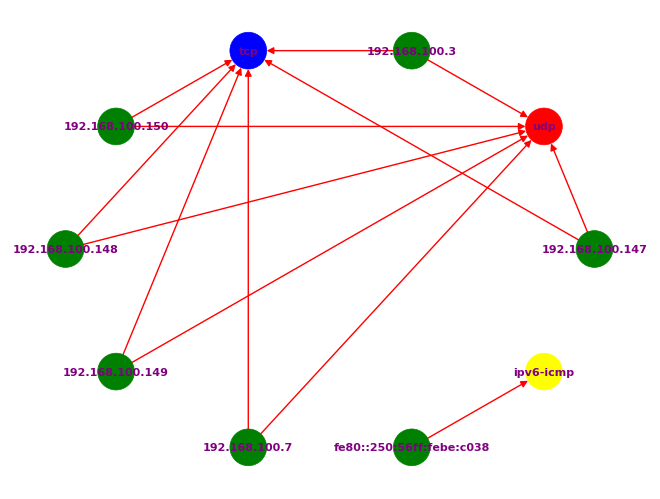

In [156]:
colors = ["red", "blue", "yellow", "pink"]
protocols = ["tcp", "udp", "icmp", "ipv6-icmp"]

# for index in range(5):
#   color = input(f"Enter the color for the protocol {protocols[index]}: ")
#   colors[index] = color

representation_with_colors(df, "SourceIPAddress", "Protocol", colors)

Graph = nx.from_pandas_edgelist(df, "SourceIPAddress", "DestinationIPAddress", ["Attack", "PacketCount"], create_using=nx.DiGraph())

In [157]:
def plot_xy_graph(quantity, graph_name, x_label, y_label):
  quantity_nodes = list(quantity.keys())
  quantity_values = list(quantity.values())

  plt.scatter(quantity_nodes, quantity_values, s = 5)
  plt.title(graph_name)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()

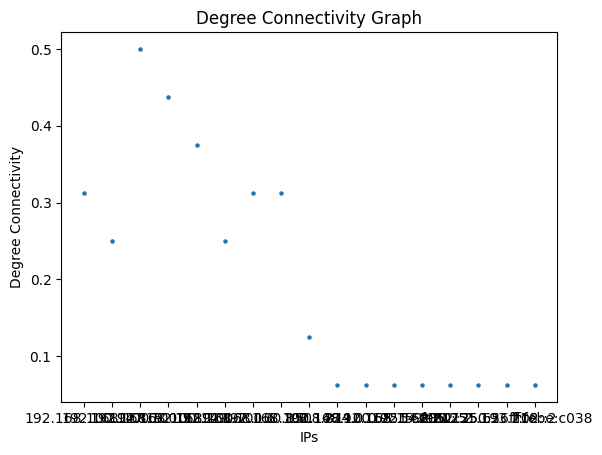

In [158]:
# Degree connectivity
degree_connectivity = nx.degree_centrality(Graph)
plot_xy_graph(degree_connectivity, "Degree Connectivity Graph", "IPs", "Degree Connectivity")

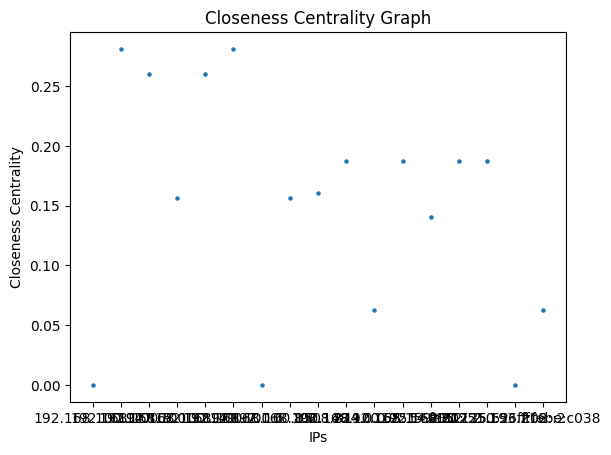

In [159]:
# Closeness connectivity
closeness_centrality = nx.closeness_centrality(Graph)
plot_xy_graph(closeness_centrality, "Closeness Centrality Graph", "IPs", "Closeness Centrality")

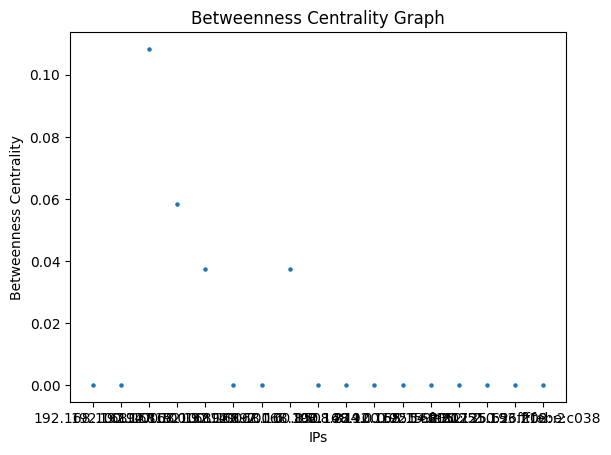

In [160]:
# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(Graph)
plot_xy_graph(betweenness_centrality, "Betweenness Centrality Graph", "IPs", "Betweenness Centrality")

In [161]:
# Network Density
network_density = nx.density(Graph)
print("Network Density:", network_density)

Network Density: 0.09926470588235294


In [162]:
# Network Diameter and Network average Path Length
largest_strongly_connected_component = max(nx.strongly_connected_components(Graph), key=len)
subgraph = Graph.subgraph(largest_strongly_connected_component)

network_diameter = nx.diameter(subgraph)
average_path_length = nx.average_shortest_path_length(subgraph)
print("Network Diameter:", network_diameter)
print("Network Average Path Length:", average_path_length)

Network Diameter: 3
Network Average Path Length: 1.6666666666666667
